In [1]:
# this code is generated by the Domino Code Assist toolbar button
import domino_code_assist as dca
dca.init()

Cannot show ipywidgets in text

In [3]:
import pandas as pd

df = pd.read_csv("/mnt/admin_setup/data/CCGT.csv")
df

,HDF,datetime,CCGT,OTHER,OIL,COAL,NUCLEAR
0,FUELHH,2022-09-01 00:00:00,12833.0,184.0,0,880,4686
1,FUELHH,2022-09-01 00:30:00,12611.0,167.0,0,895,4698
2,FUELHH,2022-09-01 01:00:00,12417.0,148.0,0,823,4700
3,FUELHH,2022-09-01 01:15:00,NaN,NaN,0,824,4699
4,FUELHH,2022-09-01 01:18:00,12333.0,NaN,0,819,4698
...,...,...,...,...,...,...,...
10425,FUELHH,2023-04-06 04:00:00,10943.0,192.0,0,230,4127
10426,FUELHH,2023-04-06 04:30:00,10929.0,188.0,0,230,4134
10427,FUELHH,2023-04-06 05:00:00,11245.0,142.0,0,230,4137
10428,FUELHH,2023-04-06 05:30:00,11670.0,136.0,0,230,4138


In [4]:
df = df.loc[df["OTHER"].notna()]
df = df.loc[df["CCGT"].notna()]
df

,HDF,datetime,CCGT,OTHER,OIL,COAL,NUCLEAR
0,FUELHH,2022-09-01 00:00:00,12833.0,184.0,0,880,4686
1,FUELHH,2022-09-01 00:30:00,12611.0,167.0,0,895,4698
2,FUELHH,2022-09-01 01:00:00,12417.0,148.0,0,823,4700
5,FUELHH,2022-09-01 01:30:00,12332.0,145.0,0,735,4698
6,FUELHH,2022-09-01 02:00:00,12178.0,141.0,0,619,4698
...,...,...,...,...,...,...,...
10425,FUELHH,2023-04-06 04:00:00,10943.0,192.0,0,230,4127
10426,FUELHH,2023-04-06 04:30:00,10929.0,188.0,0,230,4134
10427,FUELHH,2023-04-06 05:00:00,11245.0,142.0,0,230,4137
10428,FUELHH,2023-04-06 05:30:00,11670.0,136.0,0,230,4138


In [3]:
from solara.express import CrossFilteredFigurePlotly
import plotly.express as px

_base_var_1 = px.area(df, x="datetime", y="CCGT")
_base_var_1.update_layout(margin=dict(l=0, r=0, t=40 if _base_var_1.layout.title.text else 20, b=0))
var_1 = CrossFilteredFigurePlotly(_base_var_1)

var_1

Cannot show ipywidgets in text

In [4]:
## DCA edit snippet: /mnt/snippets/drop_null_rows.py
df = df.dropna(axis=0, how='any')
df

,HDF,datetime,CCGT,OTHER,OIL,COAL,NUCLEAR
0,FUELHH,2022-09-01 00:00:00,12833.0,184.0,0,880,4686
1,FUELHH,2022-09-01 00:30:00,12611.0,167.0,0,895,4698
2,FUELHH,2022-09-01 01:00:00,12417.0,148.0,0,823,4700
5,FUELHH,2022-09-01 01:30:00,12332.0,145.0,0,735,4698
6,FUELHH,2022-09-01 02:00:00,12178.0,141.0,0,619,4698
...,...,...,...,...,...,...,...
10425,FUELHH,2023-04-06 04:00:00,10943.0,192.0,0,230,4127
10426,FUELHH,2023-04-06 04:30:00,10929.0,188.0,0,230,4134
10427,FUELHH,2023-04-06 05:00:00,11245.0,142.0,0,230,4137
10428,FUELHH,2023-04-06 05:30:00,11670.0,136.0,0,230,4138


In [6]:
## DCA edit snippet: /mnt/snippets/train_model.py
# Using Prophet to predict future demand of our fuel type.
# Prepare the data formatting for use, with the fuel_type = list(df.columns)[2] to pick the fuel type automatically
fuel_type = list(df.columns)[2]
fuel_type
df_for_prophet = df[['datetime', fuel_type]].rename(columns = {'datetime':'ds', fuel_type:'y'})
df_for_prophet['ds'] = pd.to_datetime(df['datetime'])

# Create our training and testing sets from the data
X = df_for_prophet.copy()
y = df_for_prophet['y']
proportion_in_training = 0.8
split_index = int(proportion_in_training*len(y))
X_train, y_train = X.iloc[:split_index], y.iloc[:split_index]
X_test, y_test = X.iloc[split_index:], y.iloc[split_index:]

# import Prophet and train our model!
from fbprophet import Prophet
m = Prophet()
m.fit(X_train)

# save our model file
import pickle
with open("model.pkl", "wb") as f:
      pickle.dump(m, f)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -384.306
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       10049.9      0.083818       800.305           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       10284.9     0.0404256        551.83      0.7087      0.7087      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       10382.1      0.060607       318.822           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       10411.5     0.0979163       368.603           1           1      478   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       10431.9      0.012513        360.52       9.515      0.9515      603   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<Figure size 640x480 with 0 Axes>

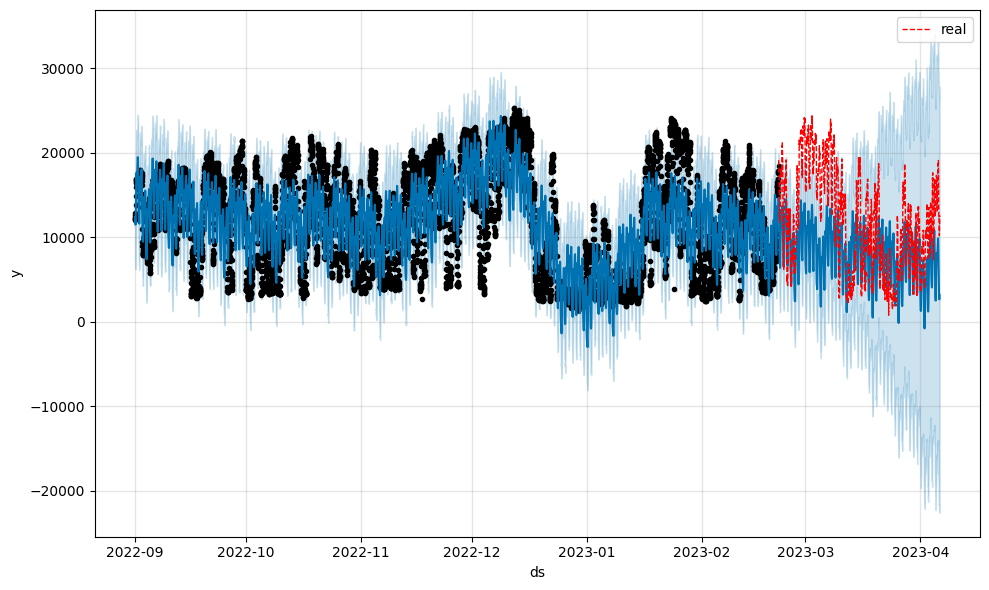

In [7]:
## DCA edit snippet: /mnt/snippets/predict_demand.py
#Once we have trained the model we can use it to predict future energy production needs:
future = m.make_future_dataframe(periods=int(len(y_test)/2), freq='H')
forecast = m.predict(future)

#And create a visualisation of it:
import matplotlib.pyplot as plt
plt.gcf()
fig = m.plot(forecast)
plt.plot(X_test['ds'].dt.to_pydatetime(), X_test['y'], 'r', linewidth = 1, linestyle = '--', label = 'real')
plt.legend()

In [28]:
## DCA edit snippet: /mnt/snippets/cross_validation.py
# Do Some Cross Validation and report the results back to a central database
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
from domino.data_sources import DataSourceClient
import os

# Prophet cross validation
df_cv = cross_validation(m, initial='30 days', horizon='30 days')
df_p = performance_metrics(df_cv, rolling_window=1)

# Write the output to Snowflake
ds = DataSourceClient().get_datasource("Snowflake")
sql = "INSERT INTO hybridworkshop (NAME, LOCATION, PROJECT, TYPE, FUEL, MAE, RMSE) VALUES ('{}', '{}', '{}', 'Workspace', '{}', '{}', '{}');".format(os.environ.get("DOMINO_STARTING_USERNAME"),os.environ.get("DOMINO_HARDWARE_TIER_ID"),os.environ.get("DOMINO_PROJECT_NAME"),fuel_type,round(df_p['mae'][0], 3),round(df_p['rmse'][0], 3))
ds.query(sql)
print(df_p)

INFO:fbprophet:Making 8 forecasts with cutoffs between 2022-10-09 17:30:00 and 2023-01-22 17:30:00


  0%|          | 0/8 [00:00<?, ?it/s]

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -51.7188
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2484.17     0.0405688       179.728      0.2674           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2497.68    0.00457361       67.3392           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     275       2498.71    0.00023059       73.0585   2.139e-06       0.001      391  LS failed, Hessian reset 
     299       2498.73   3.12373e-06       77.8643       2.797      0.2797      426   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2498.88   1.41067e-05       68.4133      0.1637           1      563   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     417       2498.88   6.12435e-08    

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -101.788
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3432.97    0.00345563       107.465       1.922      0.1922      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       3442.99    0.00101327       152.041   3.259e-06       0.001      220  LS failed, Hessian reset 
     199       3451.15     0.0011231       67.0025           1           1      314   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       3451.47   0.000719383           126   7.053e-06       0.001      363  LS failed, Hessian reset 
     251       3451.68   0.000106675       63.7699   1.695e-06       0.001      460  LS failed, Hessian reset 
     296       3451.69   5.42501e-08       71.2568     0.04559           1      529   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -91.6805
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4270.83    0.00354834       81.7525      0.5674      0.5674      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     110       4271.66   0.000389835       80.9469    4.36e-06       0.001      172  LS failed, Hessian reset 
     199       4283.68      0.010861        104.91       0.498           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     278       4288.78   0.000624761       121.564   8.215e-06       0.001      416  LS failed, Hessian reset 
     299       4289.22   0.000512218       79.0342           1           1      440   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        4290.4   0.000779893         66.44      0.2655      0.2655      565   
    Iter      log pro

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -126.817
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5029.84    0.00441887       80.5036           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     167       5039.62   0.000771413       173.683    3.39e-06       0.001      252  LS failed, Hessian reset 
     199       5043.54   0.000854674       76.4656      0.4506      0.4506      289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     285       5049.94      0.002137       239.059   1.454e-05       0.001      458  LS failed, Hessian reset 
     299       5051.64   0.000748737       122.425      0.4981      0.4981      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5052.83   0.000537446        67.997      0.4311      0.4311      595   
    Iter      log pro

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -250.087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6141.38    0.00941186       115.986           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     162       6153.56   0.000864053       245.848   3.141e-06       0.001      228  LS failed, Hessian reset 
     191       6161.22    0.00125776       189.885   1.266e-05       0.001      296  LS failed, Hessian reset 
     199        6161.7    0.00247357       119.455           1           1      304   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     271       6167.51    0.00232168       233.444   2.662e-05       0.001      426  LS failed, Hessian reset 
     299        6168.6    0.00023639       63.6406           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -154.252
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6908.17     0.0192147       143.283           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       6919.43    0.00394935        445.89   3.595e-05       0.001      181  LS failed, Hessian reset 
     199       6935.86    0.00761558       137.687      0.4083      0.4083      274   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6956.42   0.000733783        152.91      0.6088      0.6088      401   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     331        6959.8   0.000498409       156.787    2.02e-06       0.001      475  LS failed, Hessian reset 
     399       6963.23   0.000560121       132.463           1           1      572   
    Iter      log pro

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -300.713
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7979.23      0.024863       730.877           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8003.06    0.00241123       169.976      0.4554      0.9651      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     296       8013.24   0.000748472       240.724   1.599e-06       0.001      404  LS failed, Hessian reset 
     299       8013.66     0.0012963       106.588           1           1      407   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     388       8019.38   0.000729591       195.699   5.804e-06       0.001      550  LS failed, Hessian reset 
     399       8019.99    0.00143573       60.8971           1           1      561   
    Iter      log pro

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -361.864
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8531.94     0.0248072        250.42           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8719.15     0.0449195       1202.26      0.2838           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8825.74    0.00518832       190.373      0.1738      0.1738      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8857.73    0.00514404       522.561           1           1      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8908.64    0.00792975       144.108           1           1      588   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



  horizon           mse          rmse           mae      mape   mdape  \
0 30 days  1.824839e+08  13508.660079  11171.985866  1.544375  0.9578   

   coverage  
0  0.310677  
